# **CNN assignment**(Do read the note at the end)

Description: Here we are going to use CNN to classify images of elephants,tigers,cheetah's and crocodiles. Basically multiclass classificiation using CNN.

**Q.1** Import all required modules

In [61]:

import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import os
import  cv2
import matplotlib.pyplot as plt
import numpy as np

**Q.2** Load data using image_dataset_from_directory(https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory)

In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/data',
    image_size=(256, 256),
    label_mode="int",
    batch_size=32,
    shuffle=True
)

Found 1658 files belonging to 4 classes.




*   Since data object is not iterable,we will create a nummpy iterator for data.
*   Then use batch to iterate through our data



In [64]:
data_iterator=dataset.as_numpy_iterator()

In [65]:
batch=data_iterator.next()

Run the below code and batch code 2-3 times to visualise the labels given to different animals.

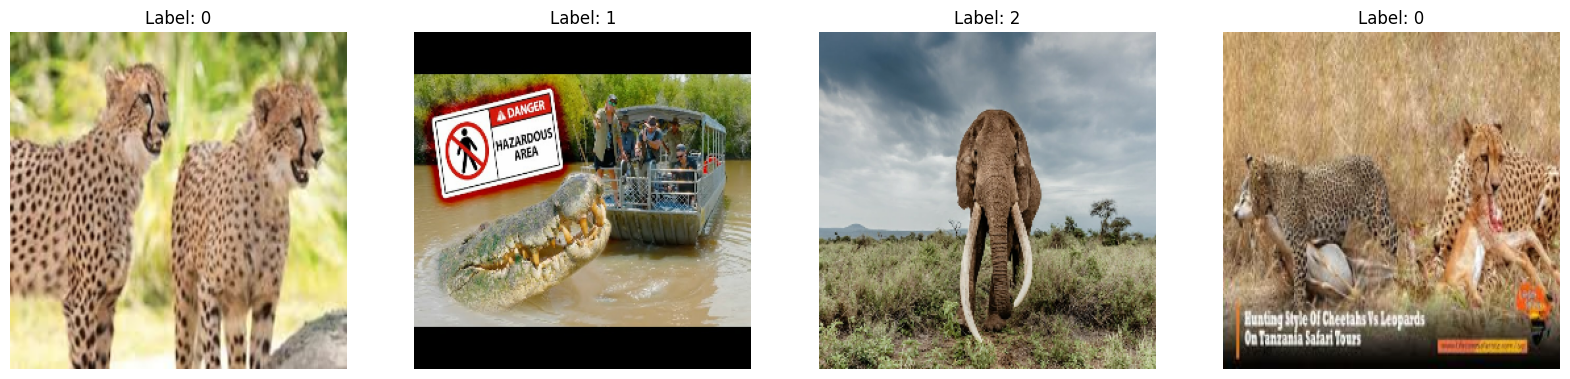

In [66]:
for batch in dataset.take(1):
    images, labels = batch

fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(images[:4]):
    ax[idx].imshow(img.numpy().astype(int))
    ax[idx].title.set_text(f'Label: {labels[idx].numpy()}')
    ax[idx].axis('off')  # Hide the axes for a cleaner look

plt.show()

**Q.3** Map the data such that all pixel values lie between 0 and 1 using the **lambda function**

In [67]:
def normalize_images(images, labels):
    images = images / 255.0
    return images, labels

dataset = dataset.map(normalize_images)

print(dataset)

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


**Q.4** Split the data into train set and test set(and validation set if needed) using **data.take**(https://www.geeksforgeeks.org/tensorflow-js-tf-data-dataset-class-take-method/) and **data.skip**(https://www.geeksforgeeks.org/tensorflow-js-tf-data-dataset-skip-method/)

In [68]:
# Shuffle the dataset and split into train and test sets
def split_dataset(dataset, test_size=0.25):
    # Shuffle and take the dataset to ensure reproducibility
    dataset_size = len(dataset)
    test_size = int(dataset_size * test_size)

    # Create a shuffled dataset
    dataset = dataset.shuffle(buffer_size=dataset_size, reshuffle_each_iteration=False)

    # Split dataset
    train_dataset = dataset.skip(test_size)
    test_dataset = dataset.take(test_size)

    return train_dataset, test_dataset

train_dataset, test_dataset = split_dataset(dataset)

# Optional: If you want a validation set as well
val_size = int(len(train_dataset) * 0.2)
train_dataset = train_dataset.skip(val_size)
val_dataset = train_dataset.take(val_size)



**Creating the model**

**Q.5** Write code to create CNN model including fully connected layers with softmax as final layer.

In [69]:

model = tf.keras.models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(4, activation='softmax')
])

**Q.6** Compile your model

In [70]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Q.7** Fit your model with train set and make sure to keep **less epochs**(10-15) as the dataset size is very large.

In [71]:
model.fit(
  train_dataset,
    epochs=10,
    batch_size=32,
    verbose=1,
    validation_data=val_dataset
)

Epoch 1/15
32/32 [==============================] - 198s 6s/step - loss: 1.6558 - accuracy: 0.2578 - val_loss: 1.3686 - val_accuracy: 0.2991
Epoch 2/15
32/32 [==============================] - 210s 6s/step - loss: 1.3457 - accuracy: 0.3447 - val_loss: 1.2714 - val_accuracy: 0.3750
Epoch 3/15
32/32 [==============================] - 194s 6s/step - loss: 1.2519 - accuracy: 0.4375 - val_loss: 1.1478 - val_accuracy: 0.5000
Epoch 4/15
32/32 [==============================] - 193s 6s/step - loss: 1.0845 - accuracy: 0.5283 - val_loss: 1.2063 - val_accuracy: 0.4509
Epoch 5/15
32/32 [==============================] - 189s 5s/step - loss: 1.0559 - accuracy: 0.5654 - val_loss: 0.8931 - val_accuracy: 0.6473
Epoch 6/15
32/32 [==============================] - 198s 6s/step - loss: 0.8947 - accuracy: 0.6426 - val_loss: 0.8341 - val_accuracy: 0.6830
Epoch 7/15
32/32 [==============================] - 194s 6s/step - loss: 0.8089 - accuracy: 0.6797 - val_loss: 0.7760 - val_accuracy: 0.7009
Epoch 8/15
32

**Q.8** Test your code with test set

In [72]:
loss,accuracy=model.evaluate(val_dataset)

7/7 [==============================] - 25s 1s/step - loss: 0.1265 - accuracy: 0.9598


In [73]:
# Do not change this code
if accuracy>=0.85:
  print(f"Congratulations, CNN assignment complete!! Your accuracy is {accuracy}")
else:
  print(f"Try again, not enough accuracy! Your accuracy is {accuracy}" )

Congratulations, CNN assignment complete!! Your accuracy is 0.9598214030265808


**Note: 1. Many of you will get very high train accuracy but low test accuracy. This is called overfitting, this can be solved by increasing the train set size. If your getting low accuracy for both train and test, modify your layers in the model.**

**2.Do use T4GPU.Ideally your first epoch will take quite sometime and rest of the epochs will be faster but if all your epochs are taking a lot of time, try starting a new gpu session(open a new gmail account and open colab on that) because your free gpu might have exhausted itself.**

**3.Other than that everything should be fine, happy learning!!**